In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
 oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
 oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator",
 values="Value")
 gdp_per_capita.rename(columns={"2015": "GDP per capita"},
 inplace=True)
 gdp_per_capita.set_index("Country", inplace=True)
 full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
 left_index=True, right_index=True)
 full_country_stats.sort_values(by="GDP per capita", inplace=True)
 remove_indices = [0, 1, 6, 8, 33, 34, 35]
 keep_indices = list(set(range(36)) - set(remove_indices))
 return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

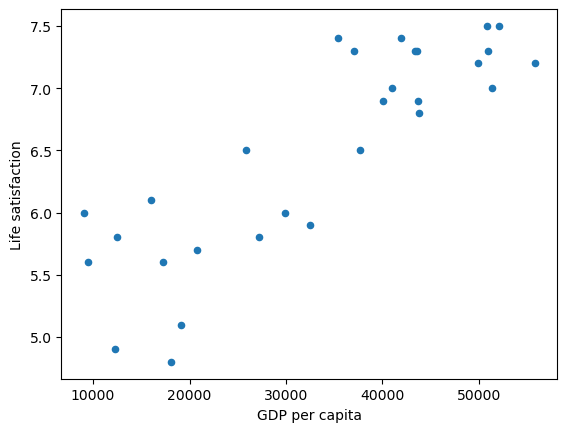

[[5.96242338]]


In [5]:
# Load the data (데이터 적재)
oecd_bli = pd.read_csv("data/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("data/lifesat/gdp_per_capita.csv",
 thousands=',',delimiter='\t',
 encoding='latin1', na_values="n/a")
# Prepare the data (데이터 전처리)
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# Visualize the data (데이터 탐색)
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()
# Select a linear model (모델 선택)
model = sklearn.linear_model.LinearRegression()
# Train the model (모델 학습, 훈련)
model.fit(X, y)
# Make a prediction for Cyprus(슬로베니아) (예측, 추론)
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

# 실습1. 마켓과 머신러닝

## 생선 분류 문제
- 마켓에 들어온 생선의 크기 정보를 입력하면 자동으로 생선이름 알려주기  
 
 
- 도미에 대한 정보안다면? "30~40cm 길이의 생선은 도미"

 
- 시스템이 스스로 기준을 찾으려면? 

### 도미 데이터 준비하기

In [6]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

- 도미의 길이, 무게는 도미의 특징을 나타내는 특성(feature)라고 함
    - 통계학에서는 변수(variable)라고 부름
- 특성은 데이터를 표현하는 하나의 성질

### 도미 길이와 무게 데이터에 대한 산점도

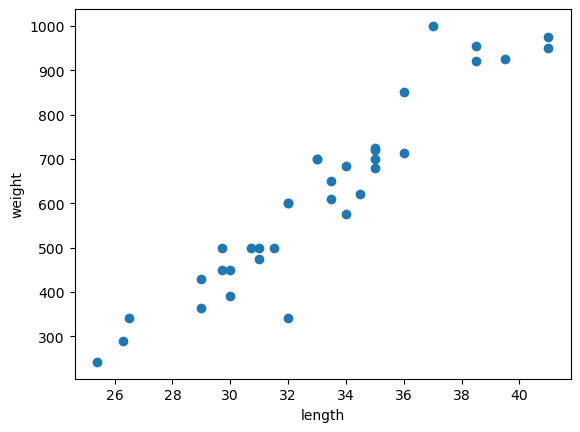

In [7]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 생선의 길이가 길수록 무게가 많이 나가는 모양 => 선형적 관계

### 빙어 데이터 준비하기

In [8]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

### 도미 데이터와 빙어 데이터 병합한 산점도

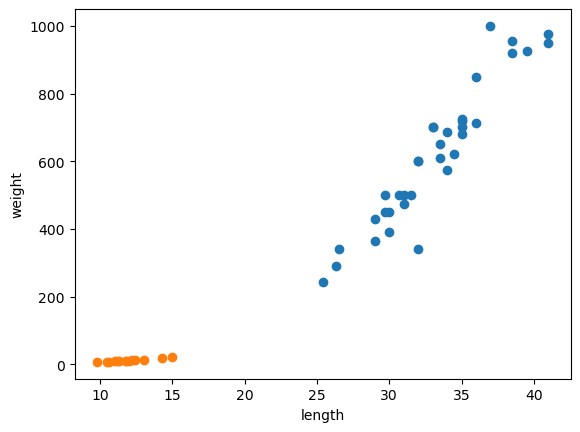

In [9]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

### 두 생선 데이터 병합

In [36]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

data = [[l,w] for l,w in zip(length, weight)]
data[:10]

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0]]

In [37]:
target = [1]*len(bream_length) + [0]*len(smelt_length)
print(target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 타겟(레이블) 데이터 생성

-----------------------------

## K-최근접 이웃(K-Nearest Neighbor) 알고리즘을 이용한 분류

### K-최근접 이웃(K-Nearest Neighbor) 알고리즘 소개

- 테스트 데이터와 K개 훈련데이터의 y값들을 비교
- 분류와 회귀 모두 활용
    - 분류 : k개 최근접 이웃들의 class들 중 다수결 결과로 class 예측
    - 회귀 : k개 최근접 이웃들이 가지고 있는 값의 평균을 결과값으로 예측
    

- 비모수방식이며 instance-based 알고리즘


- train과 test 세트로 데이터를 분리하지만 실제로 train은 존재하지 않는 게으른 알고리즘


- 구체적인 데이터를 가지고 예측을 요청할 때, K개 가장 가까운 사례를 train data set에서 찾아 해당하는 데이터의 y 값을 기반으로 예측 결과를 제시


- K 값 : 동점을 막기 위해 대개 홀수로 정함 
    - k가 작으면 이상치 등 노이즈에 민감하게 반응하여 과대적합 
        - k=1인 경우 가장 가까운 이웃과 같은 클래스가 할당됨
    - k가 크면 자료의 패턴을 파악할 수 없어 과소적합
        - k=N인 경우 전체 평균의 개념


In [12]:
import sklearn
sklearn.__version__

'1.2.2'

### 사이킷런의 K-최근접이웃 클래스

In [14]:
from sklearn.neighbors import KNeighborsClassifier

**KNeighborsClass 객체 생성**

In [15]:
kn = KNeighborsClassifier()

**훈련(training) : fit(features, label) 메서드**

In [16]:
kn.fit(data, target)

KNeighborsClassifier()

**모델 평가 : score() 메서드 => 정확도**

In [17]:
kn.score(data, target)

1.0

**정확도(accuracy)**

- 정확한 답을 몇개 맞추었는지를 백분율로 나타낸 값
-  $정확히 맞힌 개수 / 전체 데이터수$

### K-최근접 이웃 알고리즘을 이용한 새로운 데이터 분류

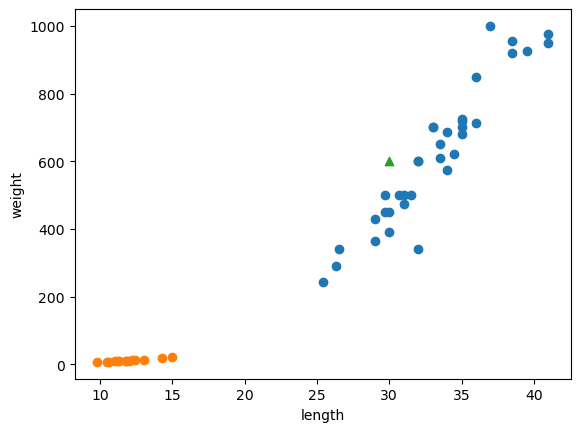

In [18]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600, marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
# 2차원 리스트 사용
kn.predict([[30,600], [50,550], [5,20]])

array([1, 1, 0])

**_fit_X  속성** : fish_data를 가지고 있음

In [27]:
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


**_y 속성** : fish_target 을 가지고 있음

In [23]:
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [24]:
kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**K-neighbors 크기 지정**

In [30]:
kn49 = KNeighborsClassifier(n_neighbors=49)

**K=49인 경우 모델 훈련 및 성능**

In [31]:
kn49.fit(data, target)
kn49.score(data, target)

0.7142857142857143

In [32]:
kn49.predict([[30,600], [50,550], [5,20]])

array([1, 1, 1])

-----------------------------------------------

### 확인 문제

1. 가장 가까운 이웃을 참고하여 정답을 예측하는 알고리즘이 구현된 사이킷런 클래스는 무엇인가?

2. 사이킷런 모델을 훈련할 때 사용하는 메서드는 무엇인가?

3. 사이킷런의 훈련된 모델을 이용하여 값을 예측하기 위해 사용되는 메서드는?

In [ ]:
kn49.predict()

4. n_neighbors를 49로 설정했을 때 점수가 1.0보다 작았다. 즉, 정확도가 100%가 아니다. n_neigbors의 기본값인 5부터 49까지 바꾸어가며 점수가 1.0 아래로 내려가기 시작하는 이웃의 개수를 찾아보시오.

In [34]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(data, target)
kn49.score(data, target)

0.7142857142857143

In [47]:
count = 0
for n in range(5, 50):
    
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(data, target)
    scores = kn.score(data, target)
    
    if scores < 1.0:
        print(f"(정확도 < 1.0) = {n}, 정확도: {scores}, 개수: {count}개")
        break
    else:
        count += 1

(정확도 < 1.0) = 18, 정확도: 0.9795918367346939, 개수: 13개


### [마무리]

- 특성
- k-최근접 이웃 알고리즘
- 정확도

### 핵심 패키지와 함수
**scikit-learn**

- KNeighborsClassifier()
- fit()
- predict()
- score()